# COVID India - Histogram comparison

In this notebook, we will compare the COVID cases in India between states as well as between districts within a state. Particularly, we will look at the following scenarios:

1. Number of active/ailing cases vs Number of recoveries
2. Number of active/ailing cases vs Number of deaths

The above two scenarios will be seen inter-state as well as inter-district.

The data used in this study is from <a href="https://api.covid19india.org/">here</a>.

### Load the JSON file that contains statewise records

In [1]:
import requests

response = requests.get("https://api.covid19india.org/data.json")
data = response.json()
states, active, recovered, deaths = [],[],[],[]
for state in data['statewise'][1:]:
    states.append(state['statecode'])
    active.append(int(state['active']))
    recovered.append(int(state['recovered']))   
    deaths.append(int(state['deaths']))

### Plot ailing vs recovered cases (state-wise) 

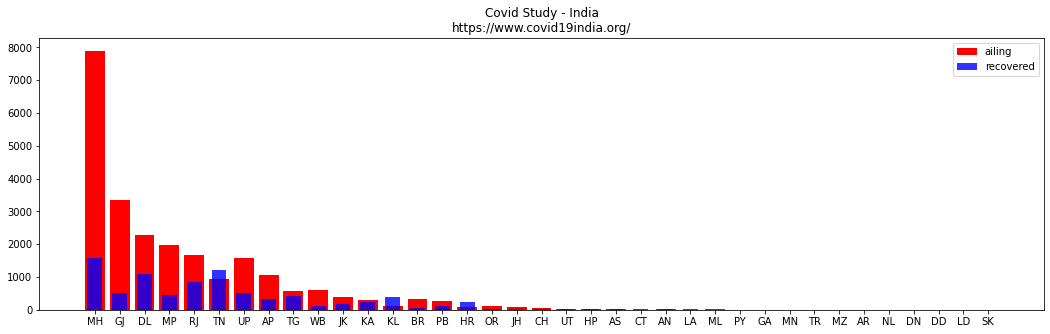

In [2]:
from matplotlib import pyplot as plt

# create plot
plt.subplots(figsize=(18,5))
indices = range(len(states))
bar_width = 0.8
opacity = 0.8

plt.bar(indices, active, width=bar_width, color='r', label='ailing')
plt.bar(indices, recovered, width=3*bar_width/4,alpha=opacity,color='b',label='recovered')
plt.xticks(indices, states)
plt.title('Covid Study - India'+'\n'+'https://www.covid19india.org/')
plt.legend()

plt.show()

### Plot ailing vs dead cases (state-wise) 

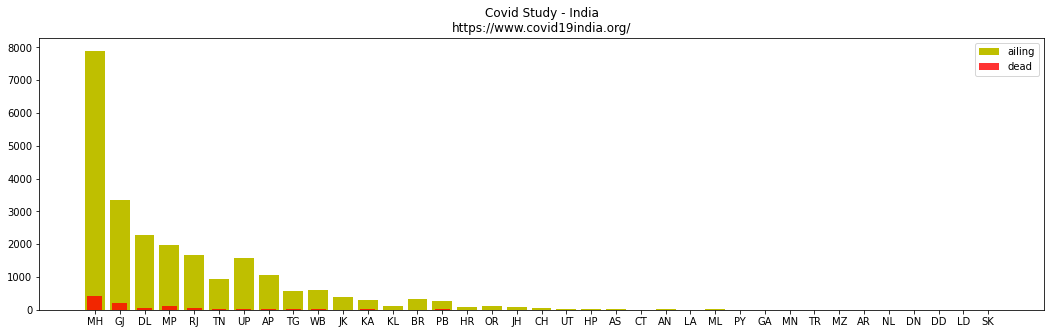

In [3]:
plt.subplots(figsize=(18,5))
plt.bar(indices, active, width=bar_width, color='y', label='ailing')
plt.bar(indices, deaths, width=3*bar_width/4,alpha=opacity,color='r',label='dead')
plt.xticks(indices, states)
plt.title('Covid Study - India'+'\n'+'https://www.covid19india.org/')
plt.legend()

plt.show()

### Repeat the above process to selected number of states 


State:  Telangana 

District                       Active Recovered Deaths
------------------------------------------------------------
Adilabad                           13      8      0
Bhadradri Kothagudem                0      4      0
Hyderabad                         379    151     18
Jagitial                            1      2      0
Jangoan                             2      1      0
Jayashankar                         3      0      0
Jogulamba Gadwal                   35      9      1
Kamareddy                           4      8      0
Karimnagar                          4     15      0
Khammam                             7      1      0
Kumuram Bheem Asifabad              7      0      0
Mahabubabad                         0      1      0
Mahabubnagar                        3      8      0
Mancherial                          0      0      1
Medak                               2      3      0
Medchal Malkajgiri                 18      3      1
Mulugu                         

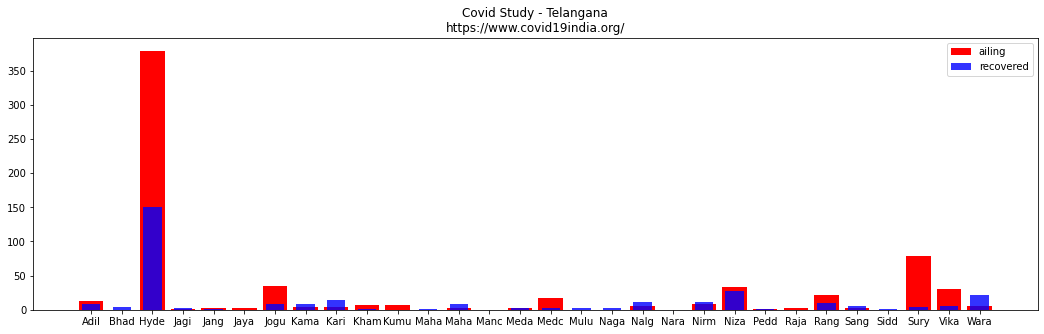


State:  Andhra Pradesh 

District                       Active Recovered Deaths
------------------------------------------------------------
Anantapur                          37     20      4
Chittoor                           64     16      0
East Godavari                      28     14      0
Guntur                            192     87      8
Krishna                           206     32      8
Kurnool                           334     43      9
Prakasam                           37     23      0
S.P.S. Nellore                     55     27      2
Srikakulam                          5      0      0
Visakhapatnam                       3     20      0
West Godavari                      45     11      0
Y.S.R.                             45     28      0


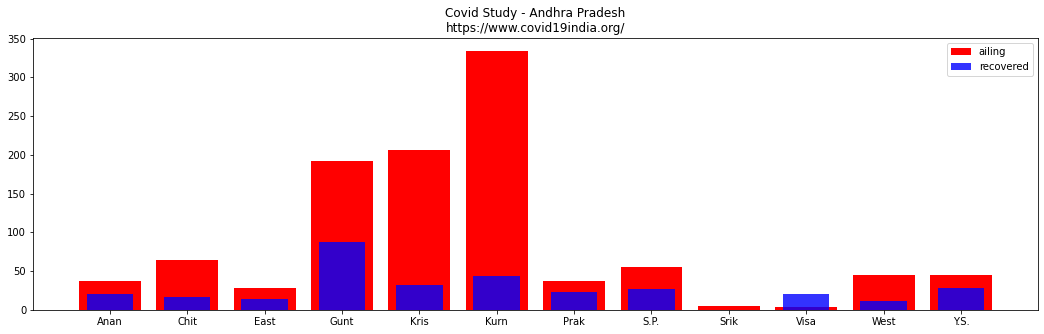


State:  Karnataka 

District                       Active Recovered Deaths
------------------------------------------------------------
Bagalkote                          22      6      1
Ballari                             8      5      0
Belagavi                           61      7      1
Bengaluru                          71     62      5
Bengaluru Rural                     3      9      0
Bidar                               6      9      0
Chikkaballapura                     5     11      2
Chitradurga                         0      1      0
Dakshina Kannada                    8     11      2
Davanagere                          2      2      0
Dharwad                             7      2      0
Gadag                               4      0      1
Kalaburagi                         40      7      5
Kodagu                              0      1      0
Mandya                             14      4      0
Mysuru                             32     58      0
Tumakuru                       

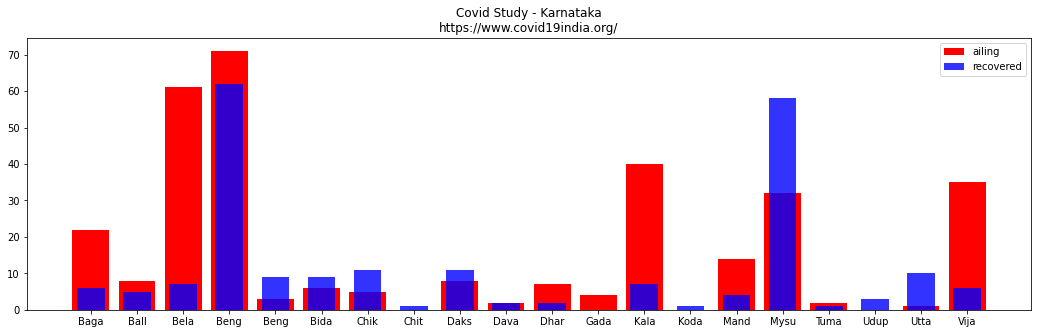

In [4]:
response = requests.get("https://api.covid19india.org/state_district_wise.json")
states = ['Telangana','Andhra Pradesh','Karnataka']
data = response.json()
for state in states:
    info = data[state]['districtData']
    districts = list(info.keys())
    if 'Unknown' in districts:
        districts.remove('Unknown')
    active, deaths, recovered = [],[],[]
    for key in districts:
        active.append(info[key]['active'])
        recovered.append(info[key]['recovered'])
        deaths.append(info[key]['deceased'])
    print('\nState: ',state,'\n')
    print("{:30} {:6} {:6} {:6}".format('District','Active','Recovered','Deaths'))
    print('-'*60)
    for idx in range(len(districts)):
        print("{:30} {:6d} {:6d} {:6d}".format(districts[idx],active[idx],recovered[idx],deaths[idx]))

    indices = range(len(districts))
    plt.subplots(figsize=(18,5))
    plt.bar(indices, active, width=bar_width, color='r', label='ailing')
    plt.bar(indices, recovered, width=3*bar_width/4,alpha=opacity,color='b',label='recovered')
    plt.xticks(indices, [dis[:4] for dis in districts])
    plt.title('Covid Study - '+state+'\n'+'https://www.covid19india.org/')
    plt.legend()

    plt.show()